In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('data/Algerian_forest_fires_cleaned_dataset.csv')

In [8]:
df.drop(columns=['day','month','year'], inplace=True)

In [9]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [10]:
df['Classes'] = np.where(df['Classes'].str.contains("not fire"), 0, 1)

In [11]:
df['Classes'].value_counts()

Classes
1    137
0    105
Name: count, dtype: int64

In [13]:
X = df.drop('FWI', axis=1)
y = df['FWI'] 

In [14]:
y

0      0.5
1      0.4
2      0.1
3      0.0
4      0.5
      ... 
237    6.5
238    0.0
239    0.2
240    0.7
241    0.5
Name: FWI, Length: 242, dtype: float64

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [44]:
X_train.shape, X_test.shape

((181, 11), (61, 11))

<Axes: >

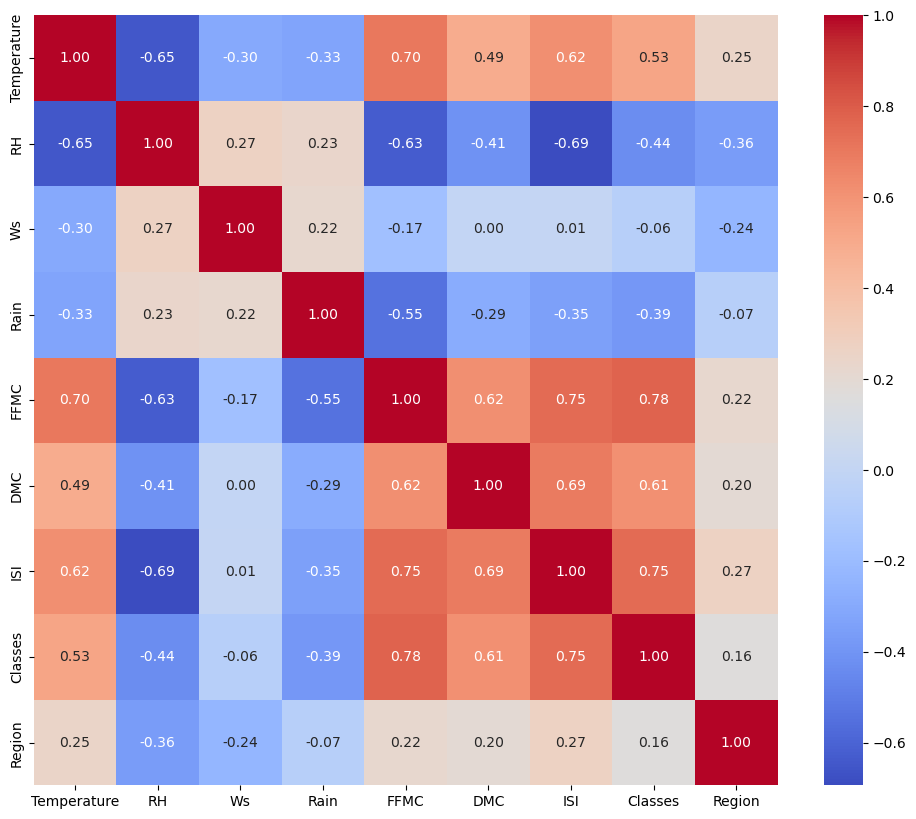

In [42]:
plt.figure(figsize=(12, 10))
sns.heatmap(X_train.corr(), annot=True, fmt='.2f', cmap='coolwarm')

In [46]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j])> threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [47]:
corr_features = correlation(X_train, 0.85)

In [48]:
X_train.drop(columns=corr_features, inplace=True)
X_test.drop(columns=corr_features, inplace=True)
X_train.shape, X_test.shape

((181, 9), (61, 9))

In [49]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [52]:
X_train_scaled

array([[-0.82836812,  0.75305576,  1.27406033, ..., -0.60658617,
        -1.07459849, -0.98356052],
       [-0.02800533, -0.52331623, -0.52192814, ...,  0.08124507,
         0.93058013,  1.01671425],
       [-0.82836812, -1.46380085, -2.67711431, ..., -0.46427625,
         0.93058013,  1.01671425],
       ...,
       [-1.89551851,  0.88741071,  0.55566494, ..., -1.05723422,
        -1.07459849, -0.98356052],
       [ 1.03914506, -0.45613875,  0.19646725, ...,  0.84023126,
         0.93058013,  1.01671425],
       [-0.56158052,  0.95458818,  1.99245572, ..., -0.84376935,
        -1.07459849, -0.98356052]])

Text(0.5, 1.0, 'Boxplot of Original Features')

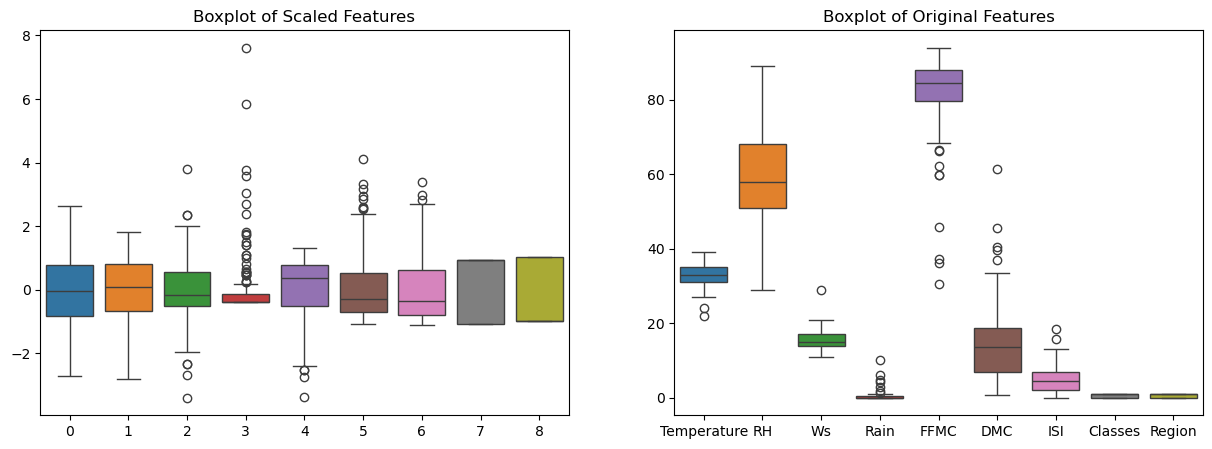

In [53]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.boxplot(data=X_train_scaled)
plt.title('Boxplot of Scaled Features')
plt.subplot(1, 2, 2)
sns.boxplot(data=X_test)
plt.title('Boxplot of Original Features')

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [56]:
regression = LinearRegression()
regression.fit(X_train_scaled, y_train)

LinearRegression()

In [57]:
y_pred_ = regression.predict(X_test_scaled)
mae = mean_squared_error(y_test, y_pred_)
score = r2_score(y_test, y_pred_)
print(f'MAE: {mae}')
print(f'R2 Score: {score}')

MAE: 0.8118865325253993
R2 Score: 0.983523052949508


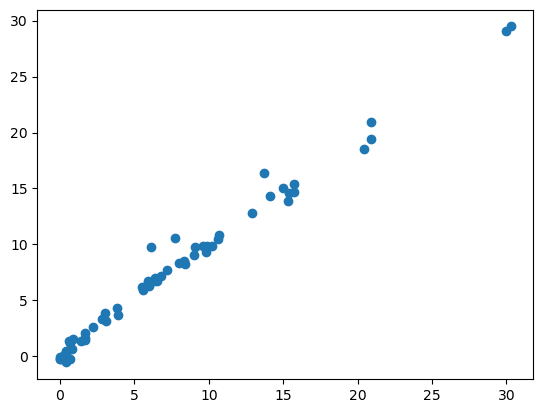

In [58]:
plt.scatter(y_test, y_pred_)